In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
oupatient_df=pd.read_csv(r"D:\Portfolio\Datasets\Hospital Outpatient.csv")
oupatient_df.head(2)

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration,Nursing,Laboratory,Consultation,Pharmacy
0,2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32
1,2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7


In [163]:
oupatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Visit_Date     1000000 non-null  object
 1   Patient_ID     1000000 non-null  int64 
 2   Age            1000000 non-null  int64 
 3   Gender         1000000 non-null  object
 4   Diagnosis      1000000 non-null  object
 5   Has_Insurance  1000000 non-null  bool  
 6   Postcode       1000000 non-null  int64 
 7   Total_Cost     1000000 non-null  int64 
 8   Registration   1000000 non-null  int64 
 9   Nursing        1000000 non-null  int64 
 10  Laboratory     1000000 non-null  int64 
 11  Consultation   1000000 non-null  int64 
 12  Pharmacy       1000000 non-null  int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 92.5+ MB


In [164]:
#Checking for null values
oupatient_df.isna().sum()

Visit_Date       0
Patient_ID       0
Age              0
Gender           0
Diagnosis        0
Has_Insurance    0
Postcode         0
Total_Cost       0
Registration     0
Nursing          0
Laboratory       0
Consultation     0
Pharmacy         0
dtype: int64

There are no null values in this dataset as the values for each column is 0.

In [165]:
#Another way to check for na values.
oupatient_df.dropna()
oupatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Visit_Date     1000000 non-null  object
 1   Patient_ID     1000000 non-null  int64 
 2   Age            1000000 non-null  int64 
 3   Gender         1000000 non-null  object
 4   Diagnosis      1000000 non-null  object
 5   Has_Insurance  1000000 non-null  bool  
 6   Postcode       1000000 non-null  int64 
 7   Total_Cost     1000000 non-null  int64 
 8   Registration   1000000 non-null  int64 
 9   Nursing        1000000 non-null  int64 
 10  Laboratory     1000000 non-null  int64 
 11  Consultation   1000000 non-null  int64 
 12  Pharmacy       1000000 non-null  int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 92.5+ MB


This again shows that even after removing na values the total number of Non-null count for each column remains the same as in the original dataframe. Hence, there are no null values.

In [166]:
# Renaming columns to make more sense of the data (i.e indicating that the meaning of columns 'Registration','Nursing','Laboratory','Consultation','Pharmacy' is the waiting time in respective section in minutes)
columns_mapping={'Registration':'Registration_Minutes','Nursing':'Nursing_Minutes','Laboratory':'Laboratory_Minutes','Consultation':'Consultation_Minutes','Pharmacy':'Pharmacy_Minutes'}
oupatient_df.rename(columns=columns_mapping,inplace=True)

In [167]:
#The dataframe with renamed columns
oupatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Visit_Date            1000000 non-null  object
 1   Patient_ID            1000000 non-null  int64 
 2   Age                   1000000 non-null  int64 
 3   Gender                1000000 non-null  object
 4   Diagnosis             1000000 non-null  object
 5   Has_Insurance         1000000 non-null  bool  
 6   Postcode              1000000 non-null  int64 
 7   Total_Cost            1000000 non-null  int64 
 8   Registration_Minutes  1000000 non-null  int64 
 9   Nursing_Minutes       1000000 non-null  int64 
 10  Laboratory_Minutes    1000000 non-null  int64 
 11  Consultation_Minutes  1000000 non-null  int64 
 12  Pharmacy_Minutes      1000000 non-null  int64 
dtypes: bool(1), int64(9), object(3)
memory usage: 92.5+ MB


# Saving Cleaned data frame

In [168]:
oupatient_df.to_csv(r"D:\Portfolio\Datasets\Hospital Outpatient-Cleaned.csv",index=False)
oupatient_df_cleaned=pd.read_csv(r"D:\Portfolio\Datasets\Hospital Outpatient-Cleaned.csv")
oupatient_df_cleaned.head(2)

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_Minutes,Nursing_Minutes,Laboratory_Minutes,Consultation_Minutes,Pharmacy_Minutes
0,2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32
1,2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7


# Demography Analysis of the patient visit

In [169]:
oupatient_df_cleaned['Gender'].value_counts()

Male      557059
Female    442941
Name: Gender, dtype: int64

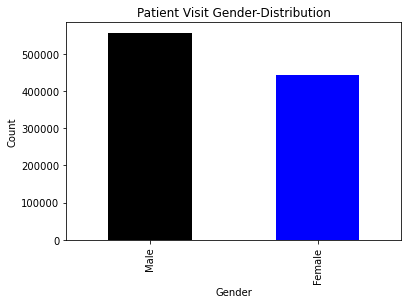

In [170]:
oupatient_df_cleaned['Gender'].value_counts().plot(kind='bar',color=['black','blue'])
plt.title('Patient Visit Gender-Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are more Male patients as compared to Female

In [171]:
oupatient_df_cleaned['Age'].max()

97

The oldest patient is 97 Years old

In [172]:
oupatient_df_cleaned['Age'].min()

0

The youngest patient is 0 years old. i.e. they are only few days or few months old. (the data is not granular enough to get the exact age of the patient)

In [173]:
age_bins=[0,10,20,30,40,50,60,70,80,90,100]
oupatient_df_cleaned['Age_Range']=pd.cut(oupatient_df_cleaned['Age'],bins=age_bins)
oupatient_df_cleaned.head(2)

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_Minutes,Nursing_Minutes,Laboratory_Minutes,Consultation_Minutes,Pharmacy_Minutes,Age_Range
0,2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32,"(50, 60]"
1,2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7,"(10, 20]"


Below is the Age distribution of Visits:-

(90, 100]     46223
(20, 30]      47763
(80, 90]      88337
(60, 70]      90781
(70, 80]      90833
(30, 40]     104837
(40, 50]     119744
(10, 20]     122591
(0, 10]      131493
(50, 60]     144168
Name: Age_Range, dtype: int64


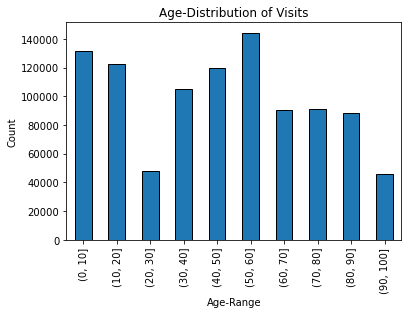

In [174]:
visit_age=oupatient_df_cleaned['Age_Range'].value_counts().sort_index()
print(visit_age.sort_values())
visit_age.plot(kind='bar',edgecolor='black')
plt.title('Age-Distribution of Visits')
plt.xlabel('Age-Range')
plt.ylabel('Count')
plt.show()

It can be observed that the most number of patients are from age group 50-60 Years old and the least number of patients are from 90-100 years old. This can be due to the fact that the number of people in the population who are 90-100 years old are less. The second lowest number of patients visiting the hospital are from the age group 20-30 years old. This can be due to the fact that people is their 20s are usually the healthiest.

Below is the postal Code distribution:-

20501    139959
10325    130415
19579     50175
12590     50159
14569     50114
12356     50003
14589     49966
13256     49939
15239     49899
18923     49879
15237     49869
19599     49775
12035     49727
10002     30452
22089     30146
10125     29995
10003     29954
10001     29873
22005     29701
Name: Postcode, dtype: int64


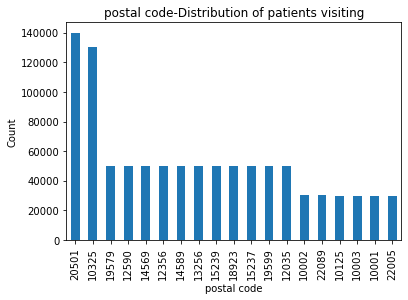

In [175]:
postalcode_counts=oupatient_df_cleaned['Postcode'].value_counts()
print(postalcode_counts)
postalcode_counts.plot(kind='bar')
plt.title('postal code-Distribution of patients visiting')
plt.xlabel('postal code')
plt.ylabel('Count')
plt.show()

It is clear from the above plot that the patients from some postal area code visits the hospital more. This can be due to the fact that the hospital is closer to those are codes or the people from those are codes tend to need medical care more.

Below is the Age-Gender Distribution:-

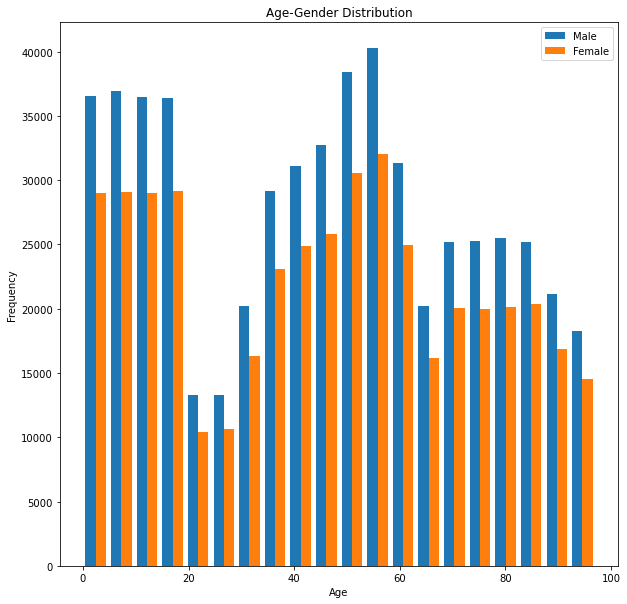

In [176]:
plt.figure(figsize=(10,10))
plt.hist([oupatient_df_cleaned[oupatient_df_cleaned['Gender']=='Male']['Age'],oupatient_df_cleaned[oupatient_df_cleaned['Gender']=='Female']['Age']],bins=20,label=['Male','Female'])
plt.title('Age-Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Below is the Diagnosis Distribution:-

Abdominal Pain              50065
Back Pain                   99858
Ear Infection              100203
Viral Infection            149607
Urinary Tract Infection    150453
Malaria                    199712
Diabetes                   250102
Name: Diagnosis, dtype: int64


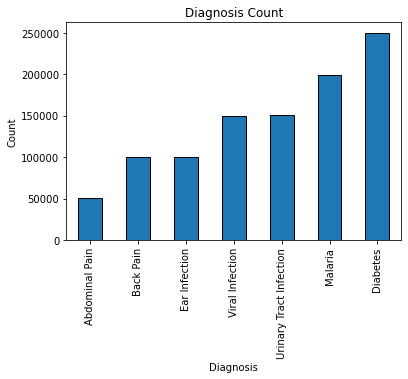

In [177]:
diagnosis=oupatient_df_cleaned['Diagnosis'].value_counts().sort_values()
print(diagnosis)
diagnosis.plot(kind='bar',edgecolor='black')
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

It can be observed that 250102  patients were diagonised with Diabetes, and about 50065 patients visited the hospital due to Abdominal Pain.

# Trend Analysis of Patient Visit

In [178]:
type(oupatient_df_cleaned['Visit_Date'][0])

str

In [179]:
#Converting "Visit_Date" Column to Date Data type
oupatient_df_cleaned['Visit_Date']=pd.to_datetime(oupatient_df_cleaned['Visit_Date'])
type(oupatient_df_cleaned['Visit_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [180]:
#Setting date as index
oupatient_df_cleaned.set_index('Visit_Date',inplace=True)

In [181]:
oupatient_df_cleaned.head()

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_Minutes,Nursing_Minutes,Laboratory_Minutes,Consultation_Minutes,Pharmacy_Minutes,Age_Range
Visit_Date,,,,,,,,,,,,,
2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32,"(50, 60]"
2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7,"(10, 20]"
2024-06-09,100003,86,Male,Viral Infection,True,10325,1965,71,58,119,63,42,"(80, 90]"
2023-09-22,100004,18,Female,Urinary Tract Infection,False,10325,2171,88,88,90,12,8,"(10, 20]"
2023-07-13,100005,68,Female,Ear Infection,True,15237,818,94,88,84,26,31,"(60, 70]"


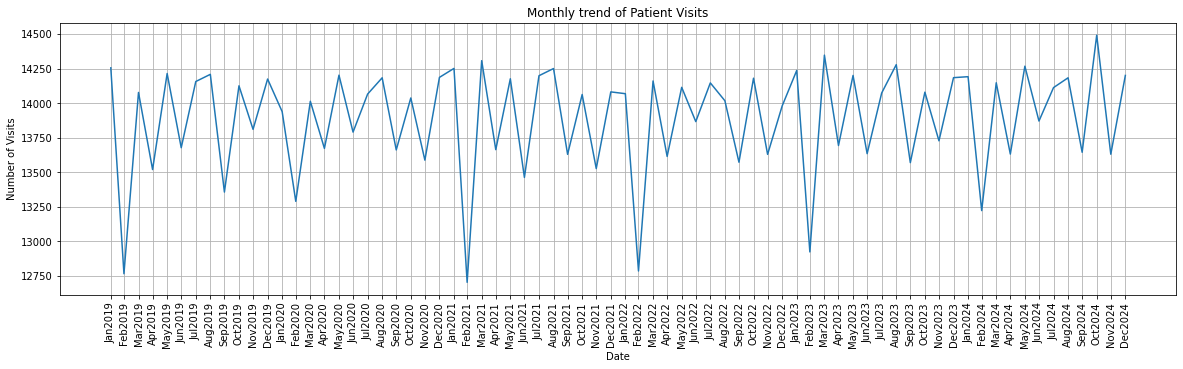

In [182]:
#Monthly visists
oupatient_df_cleaned_resampled=oupatient_df_cleaned.resample("M").count()
monthly_ticks=pd.date_range(start=oupatient_df_cleaned_resampled.index.min(),end=oupatient_df_cleaned_resampled.index.max(),freq="M")
monthly_labels=[date.strftime('%b%Y') for date in monthly_ticks]
plt.figure(figsize=(20,5))
plt.plot(oupatient_df_cleaned_resampled.index,oupatient_df_cleaned_resampled['Patient_ID'])
plt.title("Monthly trend of Patient Visits")
plt.xticks(monthly_ticks,monthly_labels, rotation=90)
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.grid()
plt.show()

It is apparent from the above plot that the number of patients visiting the hospital tends to remain low during the month of FEBRUARY throughou the past 5 years.

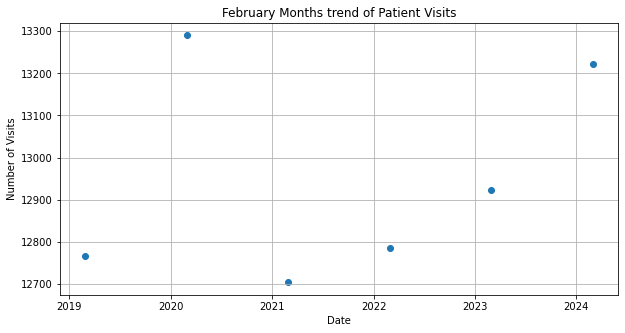

In [183]:
#Febraury Month patient visits in the past 5 years
target_month = 2
oupatient_df_target_month=oupatient_df_cleaned_resampled[oupatient_df_cleaned_resampled.index.month == target_month]
plt.figure(figsize=(10,5))
plt.scatter(oupatient_df_target_month.index,oupatient_df_target_month['Patient_ID'])
plt.title("February Months trend of Patient Visits")
plt.xlabel("Date")
plt.ylabel("Number of Visits")
plt.grid()
plt.show()

# Wait Time Analysis

In [184]:
oupatient_df_cleaned['Total_Wait_Time_Minutes']=oupatient_df_cleaned['Registration_Minutes']+oupatient_df_cleaned['Nursing_Minutes']+oupatient_df_cleaned['Laboratory_Minutes']+oupatient_df_cleaned['Consultation_Minutes']+oupatient_df_cleaned['Pharmacy_Minutes']
oupatient_df_cleaned.head(3)

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_Minutes,Nursing_Minutes,Laboratory_Minutes,Consultation_Minutes,Pharmacy_Minutes,Age_Range,Total_Wait_Time_Minutes
Visit_Date,,,,,,,,,,,,,,
2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32,"(50, 60]",316
2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7,"(10, 20]",267
2024-06-09,100003,86,Male,Viral Infection,True,10325,1965,71,58,119,63,42,"(80, 90]",353


In [185]:
oupatient_df_cleaned['Total_Wait_Time_Hours']=oupatient_df_cleaned['Total_Wait_Time_Minutes']/60
oupatient_df_cleaned.head(2)

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_Minutes,Nursing_Minutes,Laboratory_Minutes,Consultation_Minutes,Pharmacy_Minutes,Age_Range,Total_Wait_Time_Minutes,Total_Wait_Time_Hours
Visit_Date,,,,,,,,,,,,,,,
2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32,"(50, 60]",316,5.266667
2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7,"(10, 20]",267,4.450000


In [186]:
#finding average total wait time in hours
avg_total_wait_time_in_hours=oupatient_df_cleaned['Total_Wait_Time_Hours'].mean()
print("Average total wait time in Hours is:- ",avg_total_wait_time_in_hours)

Average total wait time in Hours is:-  4.326074866666666


In [187]:
mean_waiting_time_per_department=oupatient_df_cleaned[['Registration_Minutes','Nursing_Minutes','Laboratory_Minutes','Consultation_Minutes','Pharmacy_Minutes']].mean()
mean_waiting_time_per_department

Registration_Minutes    65.029518
Nursing_Minutes         66.496758
Laboratory_Minutes      66.041687
Consultation_Minutes    37.499534
Pharmacy_Minutes        24.496995
dtype: float64

The average waiting time of Nursing department is the highest at 66.496758 among all the departments

In [188]:
def department_wait_tim_statistics (df,department_name):
    if department_name not in df.columns:
        output= print("Department ",department_name, " not found in dataframe")
    else:
        wait_time_minutes=df[department_name]
    
        min_wait_time_minutes=wait_time_minutes.min()
        max_wait_time_minutes=wait_time_minutes.max()
        mean_wait_time_minutes=wait_time_minutes.mean()
        median_wait_time_minutes=wait_time_minutes.median()
        standar_deviation=wait_time_minutes.std()
    
        output= print('For the department ',department_name,', wait time range from ',min_wait_time_minutes, 'minutes to ',max_wait_time_minutes,' minutes' 
            '\nThe average wait time is ',mean_wait_time_minutes, 'minutes and the median waiting time is ',median_wait_time_minutes, 'minutes'
            '\nThe standard deviation is ',standar_deviation, 'minutes')
    return output

In [189]:
department_wait_tim_statistics(oupatient_df_cleaned,'Nursing_Minutes')

For the department  Nursing_Minutes , wait time range from  5 minutes to  128  minutes
The average wait time is  66.496758 minutes and the median waiting time is  67.0 minutes
The standard deviation is  35.77996030873765 minutes


In [190]:
department_wait_tim_statistics(oupatient_df_cleaned,'Registration_Minutes')
print("\n")

department_wait_tim_statistics(oupatient_df_cleaned,'Laboratory_Minutes')
print("\n")

department_wait_tim_statistics(oupatient_df_cleaned,'Consultation_Minutes')
print("\n")

department_wait_tim_statistics(oupatient_df_cleaned,'Pharmacy_Minutes')

For the department  Registration_Minutes , wait time range from  7 minutes to  123  minutes
The average wait time is  65.029518 minutes and the median waiting time is  65.0 minutes
The standard deviation is  33.76286988126627 minutes


For the department  Laboratory_Minutes , wait time range from  12 minutes to  120  minutes
The average wait time is  66.041687 minutes and the median waiting time is  66.0 minutes
The standard deviation is  31.457539966916386 minutes


For the department  Consultation_Minutes , wait time range from  10 minutes to  65  minutes
The average wait time is  37.499534 minutes and the median waiting time is  38.0 minutes
The standard deviation is  16.17564519375842 minutes


For the department  Pharmacy_Minutes , wait time range from  4 minutes to  45  minutes
The average wait time is  24.496995 minutes and the median waiting time is  24.0 minutes
The standard deviation is  12.117665196213482 minutes


# Correlation Analysis

In [191]:
#Drop Total_wait_times_minutes, age_range and total_wait_time_hours columns from the dataset
oupatient_df_cleaned=oupatient_df_cleaned.drop(['Total_Wait_Time_Hours','Total_Wait_Time_Minutes','Age_Range'],axis=1)

In [192]:
corelation_matrix=oupatient_df_cleaned.corr()

<ipython-input-192-d05d24b89e8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_matrix=oupatient_df_cleaned.corr()


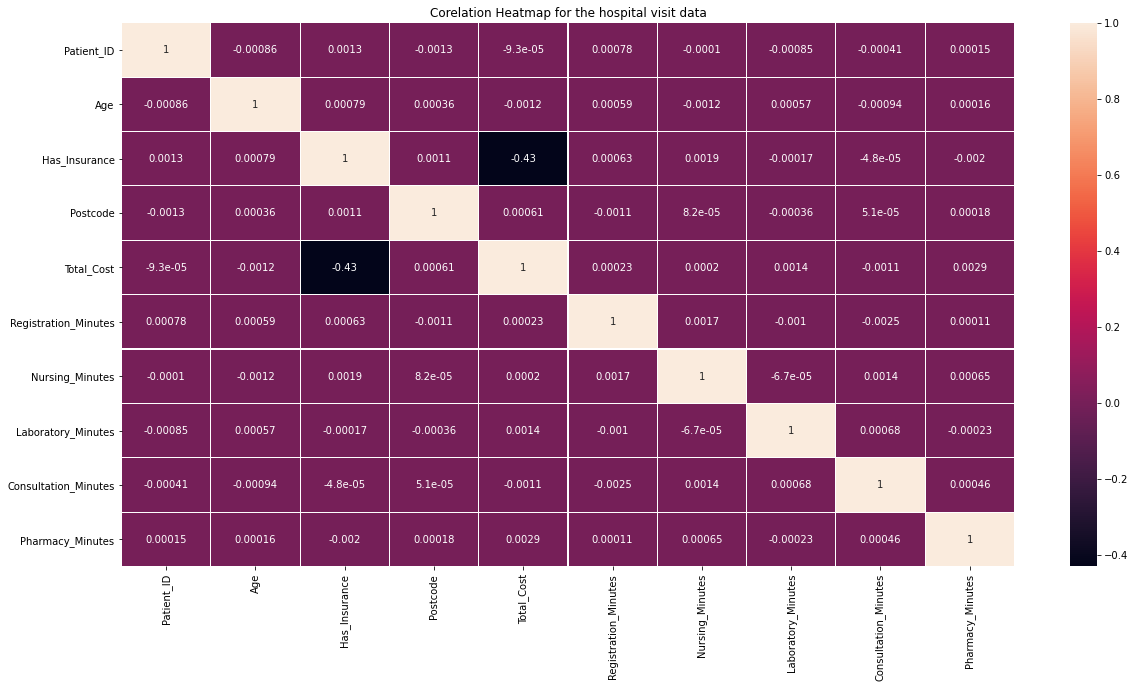

In [193]:
plt.figure(figsize=(20,10))
sns.heatmap(corelation_matrix, annot=True,linewidth=0.1)
plt.title("Corelation Heatmap for the hospital visit data")
plt.show()

The total_cost and Has_insurance features are inversely related.

# Cost and Insurance Analysis

In [194]:
average_cost_by_gender=oupatient_df_cleaned.groupby('Gender')['Total_Cost'].mean()
average_cost_by_gender

Gender
Female    1524.512355
Male      1521.138946
Name: Total_Cost, dtype: float64

The average cost for both male and female gender is almost same

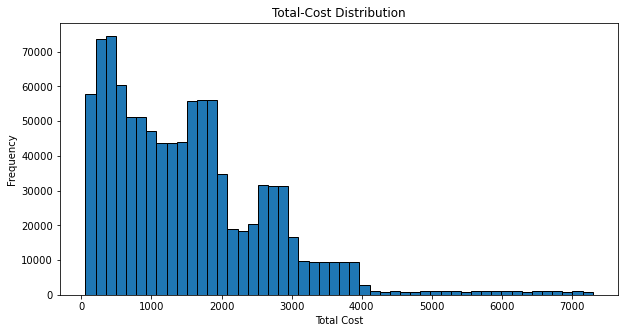

In [195]:
plt.figure(figsize=(10,5))
plt.hist(oupatient_df_cleaned['Total_Cost'],bins=50,edgecolor='Black')
plt.title('Total-Cost Distribution')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

The above histogram shows that most of patients incur the cost between 0 to 3000 range

In [196]:
average_cost_by_insurance=oupatient_df_cleaned.groupby('Has_Insurance')['Total_Cost'].mean()
average_cost_by_insurance

Has_Insurance
False    2017.801846
True     1028.370806
Name: Total_Cost, dtype: float64

The average cost for patients that don't have insurance is almost twice as that of patients that have insurance.

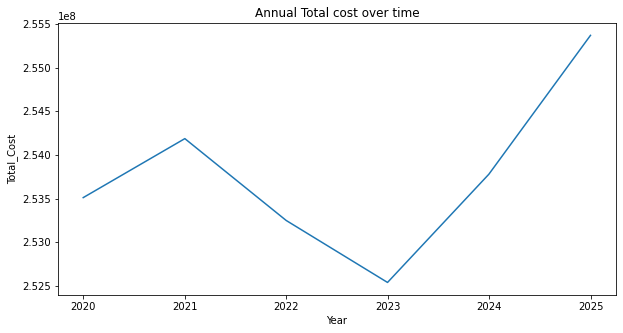

In [197]:
annual_total_cost=oupatient_df_cleaned['Total_Cost'].resample('Y').sum()
plt.figure(figsize=(10,5))
plt.plot(annual_total_cost.index, annual_total_cost.values)
plt.title('Annual Total cost over time')
plt.xlabel('Year')
plt.ylabel('Total_Cost')
plt.show()

In [198]:
oupatient_df_cleaned.head(2)

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_Minutes,Nursing_Minutes,Laboratory_Minutes,Consultation_Minutes,Pharmacy_Minutes
Visit_Date,,,,,,,,,,,,
2021-10-30,100001,59,Male,Diabetes,True,10003,570,90,79,100,15,32
2020-12-03,100002,14,Female,Diabetes,False,22005,1845,77,96,25,62,7


In [199]:
insurance_true_total_cost=oupatient_df_cleaned[oupatient_df_cleaned['Has_Insurance']==True]['Total_Cost'].resample("Y").sum()
insurance_false_total_cost=oupatient_df_cleaned[oupatient_df_cleaned['Has_Insurance']==False]['Total_Cost'].resample("Y").sum()

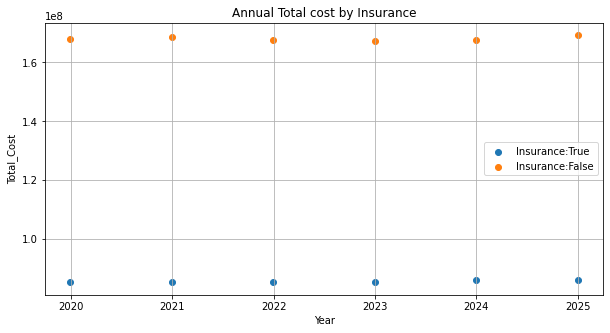

In [200]:
plt.figure(figsize=(10,5))
plt.scatter(insurance_true_total_cost.index, insurance_true_total_cost.values,label='Insurance:True')
plt.scatter(insurance_false_total_cost.index, insurance_false_total_cost.values,label='Insurance:False')
plt.title('Annual Total cost by Insurance')
plt.xlabel('Year')
plt.ylabel('Total_Cost')
plt.legend()
plt.grid()
plt.show()

The average total_cost remains almost constant over the years for both the groups of patients (i.e. patients that has insurance and patients that don't have insurance)